# Transforming Nominal Attributes
 Consider the Gender attribute, which may have three values – Male, Female, and Other. 
This is a nominal attribute as arithmetic operations can’t be applied, and we can’t 
compare the values with each other. This can be expressed as a vector of possible values.

In [1]:
import pandas as pd
df = pd.DataFrame([["Edward Remirez","Male",28,"Bachelors"],
 ["Arnav Sharma","Male",23,"Masters"],
 ["Sophia Smith","Female",19,"High School"]], columns=['Name','Gender','Age', 
'Degree'])

In [23]:
from sklearn.preprocessing import OneHotEncoder
 
encoder_for_gender= OneHotEncoder().fit(df[['Gender']])

In [16]:
 encoder_for_gender.categories_

[array(['Female', 'Male'], dtype=object)]

In [24]:
gender_values = encoder_for_gender.transform(df[['Gender']])

In [25]:
 gender_values.toarray()

array([[0., 1.],
       [0., 1.],
       [1., 0.]])

In [26]:
 df[['Gender_F', 'Gender_M']] = gender_values.toarray()

In [27]:
df

,Name,Gender,Age,Degree,Gender_F,Gender_M,Degree_encoded
0,Edward Remirez,Male,28,Bachelors,0.0,1.0,1.0
1,Arnav Sharma,Male,23,Masters,0.0,1.0,0.0
2,Sophia Smith,Female,19,High School,1.0,0.0,2.0


# Transforming Ordinal Attributes
 Some attributes have relative ordering of values – these can be transformed in a slightly 
simpler manner that would also preserve the information about the ordering and help 
create more meaningful models. 

In [18]:
from sklearn.preprocessing import OrdinalEncoder
encoder_for_education = OrdinalEncoder()
encoder_for_education.fit_transform(df[['Degree']])
encoder_for_education.categories_

[array(['Bachelors', 'High School', 'Masters'], dtype=object)]

In [28]:
encoder_for_education = OrdinalEncoder(categories = [['Masters', 
'Bachelors','High School', 'Doctoral']])
df[['Degree_encoded']] = encoder_for_education.fit_transform(df[['Degree']])
df

,Name,Gender,Age,Degree,Gender_F,Gender_M,Degree_encoded
0,Edward Remirez,Male,28,Bachelors,0.0,1.0,1.0
1,Arnav Sharma,Male,23,Masters,0.0,1.0,0.0
2,Sophia Smith,Female,19,High School,1.0,0.0,2.0


In [30]:
df.drop(columns=['Name', 'Gender', 'Degree'], inplace=True)
df

,Age,Gender_F,Gender_M,Degree_encoded
0,28,0.0,1.0,1.0
1,23,0.0,1.0,0.0
2,19,1.0,0.0,2.0


 # Normalization
 Another important preprocessing step is to normalize the data so that the features 
are in a similar range. It is highly important especially in case of experiments that 
use algorithms that are affected by the distribution shape or are based on vector- or 
distance-based computations. Let’s look at the dataframe produced in the previous 
example. Alternatively, we can create a dataframe that looks exactly the same using the 
following

In [31]:
df = pd.DataFrame({'Age': {0: 28, 1: 23, 2: 19},
 'Gender_F': {0: 0.0, 1: 0.0, 2: 1.0},
 'Gender_M': {0: 1.0, 1: 1.0, 2: 0.0},
 'Degree_encoded': {0: 0.0, 1: 2.0, 2: 1.0}})
df

,Age,Gender_F,Gender_M,Degree_encoded
0,28,0.0,1.0,0.0
1,23,0.0,1.0,2.0
2,19,1.0,0.0,1.0


# Min-Max Scaling
 Min-max scaling transforms each feature by compressing it down to a scale where the 
minimum number in the dataset maps to zero and the maximum number maps to one. 
The transformation is given by
 $$ X_{\text{scaled}} = \frac{X - X_{\text{min}}}{X_{\text{max}} - X_{\text{min}}} $$

In [32]:
 from sklearn.preprocessing import MinMaxScaler
 scaler = MinMaxScaler()
 scaler.fit(df[['Age']])
 df['Age'] = scaler.transform(df[['Age']])

In [33]:
df

,Age,Gender_F,Gender_M,Degree_encoded
0,1.000000,0.0,1.0,0.0
1,0.444444,0.0,1.0,2.0
2,0.000000,1.0,0.0,1.0


 # Standard Scaling
 Standard scaling standardizes the feature values by removing the mean and scaling 
to unit variance. The value thus represents the z-value with respect to the mean and 
variance of the column. The standard score of a sample is calculated2 as

 $$ X_{\text{scaled}} = \frac{X - \mu}{\sigma} $$

Where: - \( X \) is the original value. - \( \mu \) is the mean of the dataset. - \( \sigma \) is the standard deviation of the dataset. - \( X_{\text{scaled}} \) is the scaled value.

In [34]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])

In [35]:
df

,Age,Gender_F,Gender_M,Degree_encoded
0,1.267500,0.0,1.0,0.0
1,-0.090536,0.0,1.0,2.0
2,-1.176965,1.0,0.0,1.0


# Preprocessing Text
 A lot of real-world data is present in the form of text – maybe as comments to a survey, 
or a product review on an ecommerce website, or as a social media text that we want to 
leverage. The subject of processing, understanding, and generating text is covered under 
a major field of study called Natural Language Processing (NLP). In this section, we will 
explain basic techniques for converting text to vectors that might be required by some of 
the future examples in this book.
# Preparing NLTK
 One of the most popular libraries for NLP in Python is NLTK, or Natural Language 
ToolKit. In case you haven’t used NLTK on your machine before, we will need to check if 
it is ready to use, and if not, we will download the required models.

In [39]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\INFO
[nltk_data]     STORE\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

# tokenization

In [56]:
from nltk.tokenize import word_tokenize

In [57]:
word_tokenize("Let's learn machine learning")

['Let', "'s", 'learn', 'machine', 'learning']

In [58]:
tokens = [token.lower() for token in word_tokenize("Let's learn machine learning")]
tokens

['let', "'s", 'learn', 'machine', 'learning']

# stemming

In [59]:
 from nltk.stem.porter import PorterStemmer
 stemmer = PorterStemmer()
 for token in tokens:
  print(token, " : ", stemmer.stem(token))

let  :  let
's  :  's
learn  :  learn
machine  :  machin
learning  :  learn


In [60]:
stemmed_tokens = [stemmer.stem(token) for token in tokens]
stemmed_tokens.append('and')
stemmed_tokens

['let', "'s", 'learn', 'machin', 'learn', 'and']

In [61]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\INFO
[nltk_data]     STORE\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

#  Removing Stopwords

In [62]:
from nltk.corpus import stopwords
eng_stopwords = stopwords.words('english')
for token in stemmed_tokens:
    if token in stopwords.words('english'):
        stemmed_tokens.remove(token)

In [63]:
stemmed_tokens

['let', "'s", 'learn', 'machin', 'learn']

#  Preparing Word Vectors

In [67]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
stemmer = PorterStemmer()
eng_stopwords = stopwords.words('english')
data = ["Let's learn Machine Learning Now", "The Machines are Learning", 
"It is Learning Time"]
tokens = [word_tokenize(d) for d in data]
print(tokens)
tokens = [[word.lower() for word in line] for line in tokens]
print(tokens)
for i, line in enumerate(tokens):
 for word in line:
    if word in stopwords.words('english'):
        line.remove(word)
 tokens[i] = ' '.join(line)
matrix = CountVectorizer()
print(tokens)
X = matrix.fit_transform(tokens).toarray()
X

[['Let', "'s", 'learn', 'Machine', 'Learning', 'Now'], ['The', 'Machines', 'are', 'Learning'], ['It', 'is', 'Learning', 'Time']]
[['let', "'s", 'learn', 'machine', 'learning', 'now'], ['the', 'machines', 'are', 'learning'], ['it', 'is', 'learning', 'time']]
["let 's learn machine learning", 'machines learning', 'is learning time']


array([[0, 1, 1, 1, 1, 0, 0],
       [0, 0, 1, 0, 0, 1, 0],
       [1, 0, 1, 0, 0, 0, 1]], dtype=int64)

In [71]:
pd.DataFrame(X, columns=matrix.get_feature_names_out())

,is,learn,learning,let,machine,machines,time
0,0,1,1,1,1,0,0
1,0,0,1,0,0,1,0
2,1,0,1,0,0,0,1


#  Preprocessing Images

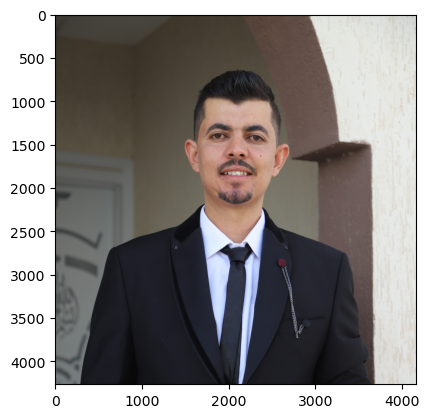

In [73]:
import matplotlib.pyplot as plt

img = plt.imread('photo_cv.JPG')
plt.imshow(img)

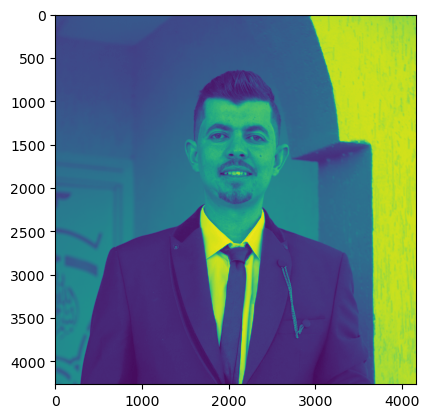

In [85]:
 plt.imshow(img[:,:,1])

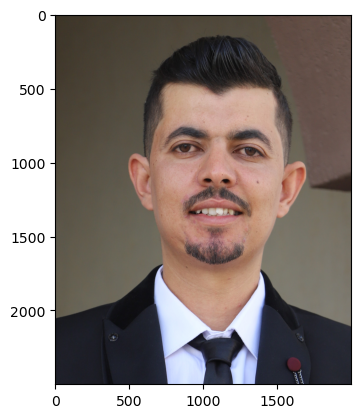

In [90]:
cropped_image = img[500:3000,1000:3000, :]
plt.imshow(cropped_image)

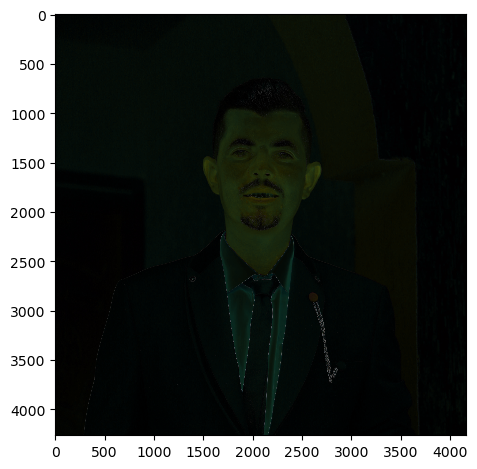

In [94]:
from skimage import io, filters
edges = filters.sobel(img)
io.imshow(edges)
io.show()